<a href="https://colab.research.google.com/github/danielifernandes33/-reprograma_aula01-/blob/main/regressao_linear_datahackers_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Análise de Dados de Emprego e Renda

Este notebook visa analisar os dados relacionados à situação de trabalho, etnia, experiência e nível de educação de indivíduos empregados no Brasil. A partir de um conjunto de dados coletados pela pesquisa da DataHachers 2022, a análise busca identificar padrões e correlações entre fatores como salário, tempo de experiência e características demográficas.

Os principais objetivos incluem:
- Investigar a relação entre o nível de educação e a renda média dos trabalhadores.
- Analisar a distribuição das diferentes etnias e sua correlação com a insatisfação no trabalho.
- Avaliar como o tempo de experiência impacta o salário dos empregados.

# Importações e Configuração Inicial

In [302]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Carregamento e Exploração de Dados

In [304]:
# Carregando a planilha de dados
df = pd.read_csv('/content/drive/MyDrive/Curso Análise de Dados Programaria/modulo_7.csv')

In [305]:
# Explorando os Dados

# Primeiras linhas
df.head()

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM BUSCA DE EMPREGO,ABERTO_OPORTUNIDADE
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,#######,...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,False,False
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,#######,...,Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,True,False
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,#######,...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1,False,True
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,#######,...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0,False,True
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,#######,...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,False,True


In [306]:
# Informações gerais sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 47 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4273 non-null   int64  
 1   ID                                                                                                                         4273 non-null   object 
 2   IDADE                                                                                                                      4273 non-null   float64
 3   FAIXA IDADE                                                                                                                4273 

In [307]:
# Deletar coluna "Unnamed: 0"
df = df.drop('Unnamed: 0', axis=1)
df

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM BUSCA DE EMPREGO,ABERTO_OPORTUNIDADE
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.000000,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,#######,Distrito Federal (DF),...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,False,False
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.000000,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,#######,Pará (PA),...,Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,True,False
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.000000,50-54,Masculino,Branca,Não,NaN,NaN,#######,Distrito Federal (DF),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1,False,True
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.000000,25-29,Masculino,Branca,Não,NaN,NaN,#######,Minas Gerais (MG),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0,False,True
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.000000,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,#######,Pará (PA),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.000000,25-29,Masculino,Branca,Não,NaN,NaN,#######,São Paulo (SP),...,Não estou buscando e não pretendo mudar de emp...,"Remuneração/Salário, Benefícios, Flexibilidade...",Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,Análise de Dados,SQL,False,False
4269,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.000000,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,#######,Minas Gerais (MG),...,Não estou buscando e não pretendo mudar de emp...,"Ambiente e clima de trabalho, Plano de carreir...",Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,"SQL, Python",False,False
4270,00zw9ks9d40z4u00zz3d20iix65qpli3,29.000000,25-29,Masculino,Branca,Não,NaN,NaN,#######,São Paulo (SP),...,"Não estou buscand

## Pré Processamento dos Dados

In [308]:
# Conta a frequência de cada categoria na coluna "QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?" e exibe os resultado.
df["QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?"].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2764
Empreendedor ou Empregado (CNPJ),410
"Desempregado, buscando recolocação",350
Estagiário,188
Servidor Público,156
Trabalho na área Acadêmica/Pesquisador,86
Somente Estudante (graduação),82
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil,69
Vivo fora do Brasil e trabalho para empresa de fora do Brasil,46


In [309]:
# Filtra o DataFrame para manter apenas as linhas em que a coluna "QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?" seja igual a "Empregado (CLT)"
df = df[df["QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?"] == "Empregado (CLT)"]

In [310]:
# Conta a frequência de cada categoria na coluna e exibe os resultado.
df["QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?"].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2764


In [311]:
# Conta a frequência de cada valor único na coluna e exibe os resultados
df['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,1807
Parda,661
Preta,181
Amarela,85
Prefiro não informar,16
Outra,10
Indígena,4


In [312]:
# Cria uma lista chamada 'lista_retirar' com os valores 'Indígena', 'Outra' e 'Prefiro não informar' para uso futuro, como remoção de dados
lista_retirar = ['Indígena', 'Outra', 'Prefiro não informar']

In [313]:
# Filtra o DataFrame 'df' para excluir as linhas em que a coluna 'COR/RACA/ETNIA' contém valores presentes na lista 'lista_retirar'
df = df[~df['COR/RACA/ETNIA'].isin(lista_retirar)]

In [314]:
# Cria uma nova coluna 'NAO_BRANCA' no DataFrame 'df', onde o valor será 1 se a coluna 'COR/RACA/ETNIA' não for 'Branca' e 0 se for 'Branca'
df['NAO_BRANCA'] = df['COR/RACA/ETNIA'].apply(lambda x: 1 if x != 'Branca' else 0)

In [315]:
# Conta a frequência de cada valor único na coluna e exibe os resultados
df['Quanto tempo de experiência na área de dados você tem?'].value_counts()

,count
Quanto tempo de experiência na área de dados você tem?,
de 1 a 2 anos,743
de 3 a 4 anos,584
de 4 a 6 anos,416
Menos de 1 ano,353
Mais de 10 anos,279
de 7 a 10 anos,232
Não tenho experiência na área de dados,127


## Extração e Tratamento de Colunas

In [316]:
# Cria uma nova coluna 'TEMPO_EXPERIENCIA' extraindo os números da coluna 'Quanto tempo de experiência na área de dados você tem?' utilizando uma expressão regular
df['TEMPO_EXPERIENCIA'] = df['Quanto tempo de experiência na área de dados você tem?'].str.extract(r'(\d+)')

In [317]:
# Conta a frequência de cada valor único na coluna e exibe os resultados
df['TEMPO_EXPERIENCIA'].value_counts()

,count
TEMPO_EXPERIENCIA,
1,1096
3,584
4,416
10,279
7,232


In [318]:
# Conta a frequência de cada valor único na coluna e exibe os resultados
df["NUMERO DE FUNCIONARIOS"].value_counts()

,count
NUMERO DE FUNCIONARIOS,
Acima de 3.000,1313
de 101 a 500,503
de 1.001 a 3.000,368
de 501 a 1.000,250
de 51 a 100,146
de 11 a 50,112
de 6 a 10,24
de 1 a 5,18


In [319]:
# Remove os pontos da coluna 'NUMERO DE FUNCIONARIOS' para facilitar a conversão de tipo
df["NUMERO DE FUNCIONARIOS"] = df["NUMERO DE FUNCIONARIOS"].str.replace(".", "")

In [320]:
# Extrai apenas os números da coluna 'NUMERO DE FUNCIONARIOS' e atualiza a coluna com esses valores
df["NUMERO DE FUNCIONARIOS"] = df["NUMERO DE FUNCIONARIOS"].str.extract(r'(\d+)')

In [321]:
# Exibe o conteúdo da coluna 'NUMERO DE FUNCIONARIOS' do DataFrame 'df'
df["NUMERO DE FUNCIONARIOS"]

,NUMERO DE FUNCIONARIOS
1,3000
2,3000
3,3000
6,3000
7,6
...,...
4264,501
4265,501
4268,3000
4269,51


In [322]:
# Conta a frequência de valores na coluna 'NUMERO DE FUNCIONARIOS', incluindo valores ausentes (NaN)
df["NUMERO DE FUNCIONARIOS"].value_counts(dropna=False)

,count
NUMERO DE FUNCIONARIOS,
3000,1313
101,503
1001,368
501,250
51,146
11,112
6,24
1,18


In [323]:
# Conta a frequência de valores na coluna 'TEMPO_EXPERIENCIA', incluindo valores ausentes (NaN)
df["TEMPO_EXPERIENCIA"].value_counts(dropna=False)

,count
TEMPO_EXPERIENCIA,
1,1096
3,584
4,416
10,279
7,232
NaN,127


In [324]:
# Substitui os valores ausentes (NaN) na coluna 'TEMPO_EXPERIENCIA' por 0
df["TEMPO_EXPERIENCIA"] = df["TEMPO_EXPERIENCIA"].fillna(0)

In [325]:
# Conta a frequência de cada valor único na coluna e exibe os resultados
df["Qual o principal motivo da sua insatisfação com a empresa atual?"].value_counts()

,count
Qual o principal motivo da sua insatisfação com a empresa atual?,
Gostaria de trabalhar em em outra área de atuação,69
Salário atual não corresponde ao mercado,53
Falta de oportunidade de crescimento no emprego atual,46
Falta de maturidade analítica na empresa,45
"Falta de oportunidade de crescimento no emprego atual, Salário atual não corresponde ao mercado, Falta de maturidade analítica na empresa",26
...,...
Trabalho explora pouco minhas habilidades e me dá poucas oportunidades de atuação distintas,1
Quero trabalhar de casa,1
"Não tenho uma boa relação com meu líder/gestor, Gostaria de trabalhar em em outra área de atuação",1


In [326]:
# Cria uma nova coluna 'INSATISFACAO' e inicializa todos os valores como 0
df["INSATISFACAO"] = 0

In [327]:
# Atualiza a coluna 'INSATISFACAO' para 1 onde a insatisfação é relacionada ao "Salário" e mantém 0 caso contrário
df.loc[df["Qual o principal motivo da sua insatisfação com a empresa atual?"].notnull(), "INSATISFACAO"] = df.loc[df["Qual o principal motivo da sua insatisfação com a empresa atual?"].notnull(),"Qual o principal motivo da sua insatisfação com a empresa atual?"].apply(lambda x: 1 if "Salário" in x else 0)

In [328]:
# Conta a frequência de cada valor único na coluna e exibe os resultados
df["INSATISFACAO"].value_counts()

,count
INSATISFACAO,
0,2455
1,279


In [329]:
# Conta a frequência de cada valor único na coluna e exibe os resultados
df["NIVEL DE ENSINO"].value_counts()

,count
NIVEL DE ENSINO,
Graduação/Bacharelado,1024
Pós-graduação,977
Mestrado,306
Estudante de Graduação,271
Doutorado ou Phd,100
Não tenho graduação formal,52
Prefiro não informar,4


In [330]:
# Converte os níveis de ensino em valores numéricos, atribuindo 0 a "Não tenho graduação formal", 1 a "Estudante de Graduação", 2 a "Graduação/Bacharelado", 3 a "Pós-graduação", 4 a "Doutorado ou PhD", e -1 para entradas não reconhecidas
df["NIVEL DE ENSINO"] = df["NIVEL DE ENSINO"].apply(lambda x: 0 if x== "Não tenho graduação formal" else
                            1 if x== "Estudante de Graduação" else
                            2 if x== "Graduação/Bacharelado" else
                            3 if x== "Pós-graduação" else
                            4 if x== "Doutorado ou Phd" else -1)


## Criação de Variáveis Dummies (variáveis binárias)

In [331]:
# Seleciona e reordena as colunas relevantes do DataFrame 'df' para análise, mantendo apenas as colunas especificadas
df = df[["IDADE", "GENERO", "NAO_BRANCA", "TEMPO_EXPERIENCIA", "INSATISFACAO", "SETOR", "REGIAO ONDE MORA", "NIVEL DE ENSINO", "NOVO_NIVEL", "SALARIO", "NUMERO DE FUNCIONARIOS"]]

In [332]:
# Exibe os nomes das colunas presentes no DataFrame 'df'
df.columns

Index(['IDADE', 'GENERO', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSATISFACAO',
       'SETOR', 'REGIAO ONDE MORA', 'NIVEL DE ENSINO', 'NOVO_NIVEL', 'SALARIO',
       'NUMERO DE FUNCIONARIOS'],
      dtype='object')

In [333]:
# Converte as colunas categóricas "GENERO", "REGIAO ONDE MORA", "NOVO_NIVEL" e "SETOR" em variáveis dummy, removendo a primeira categoria para evitar multicolinearidade
df = pd.get_dummies(df, columns=["GENERO", "REGIAO ONDE MORA", "NOVO_NIVEL", "SETOR"], drop_first=True)

## Divisão dos Dados em Conjuntos de Treinamento e Teste

In [334]:
# Separa o DataFrame 'df' em duas partes: 'X', que contém todas as colunas exceto 'SALARIO', e 'y', que contém apenas a coluna 'SALARIO', que será usada como variável alvo em um modelo preditivo.
X = df.drop("SALARIO", axis=1)
y = df["SALARIO"]


In [335]:
# Divide os dados em conjuntos de treino e teste: 'X_train' e 'y_train' para treinamento, e 'X_test' e 'y_test' para teste,
# utilizando 20% dos dados para teste e garantindo reprodutibilidade com um valor fixo de 'random_state'.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [336]:
# Cria uma instância do StandardScaler para normalização
scaler = StandardScaler()

# Ajusta o scaler nos dados de treinamento e transforma os dados de treinamento
X_train_scaled = scaler.fit_transform(X_train)

# Transforma os dados de teste com o scaler ajustado
X_test_scaled = scaler.transform(X_test)

In [337]:
# Exibe as formas dos conjuntos de dados escalonados
print(X_train_scaled.shape)
print(y_train.shape)

(2187, 35)
(2187,)


## Criação e Treinamento do Modelo

In [338]:
# Cria uma instância do modelo de regressão linear, que será utilizado para ajustar e prever os dados de entrada.
model = LinearRegression()

In [339]:
# Ajusta o modelo de regressão linear aos dados de treinamento escalados, utilizando as características 'X_train_scaled' e os rótulos 'y_train'.
model.fit(X_train_scaled, y_train)

LinearRegression()

## Previsão e Avaliação do Modelo

In [340]:
# Faz previsões com o modelo de regressão linear usando os dados de teste escalados 'X_test_scaled' e armazena os resultados em 'y_pred'.
y_pred = model.predict(X_test_scaled)

In [341]:
# Calcula o erro quadrático médio (MSE) entre os valores reais de teste 'y_test' e as previsões 'y_pred', avaliando a performance do modelo.
mse = mean_squared_error(y_test, y_pred)
mse

25589306.389406014

In [342]:
# Calcula o erro absoluto médio (MAE) entre os valores reais de teste 'y_test' e as previsões 'y_pred', fornecendo uma medida da precisão das previsões do modelo.
mae = mean_absolute_error(y_test, y_pred)
mae

3397.380829472252

In [343]:
# Calcula o coeficiente de determinação (R²) entre os valores reais de teste 'y_test' e as previsões 'y_pred', indicando a proporção da variabilidade
# nos dados que é explicada pelo modelo.
r2 = r2_score(y_test, y_pred)
r2

0.5130363433377375

##Visualização de dados

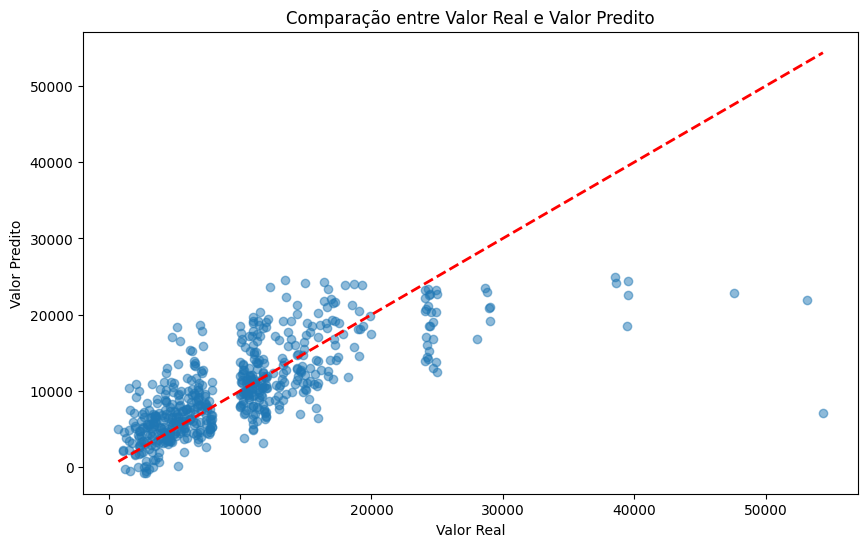

In [344]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("Comparação entre Valor Real e Valor Predito")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.show()

In [345]:
# Armazena os nomes das colunas do DataFrame 'X_train' na variável 'nomes_atributos', permitindo fácil referência aos atributos utilizados no treinamento do modelo.
nomes_atributos = X_train.columns
nomes_atributos

Index(['IDADE', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSATISFACAO',
       'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'GENERO_Masculino',
       'GENERO_Prefiro não informar', 'REGIAO ONDE MORA_Nordeste',
       'REGIAO ONDE MORA_Norte', 'REGIAO ONDE MORA_Sudeste',
       'REGIAO ONDE MORA_Sul', 'NOVO_NIVEL_Pessoa Gestora', 'NOVO_NIVEL_Pleno',
       'NOVO_NIVEL_Sênior', 'SETOR_Educação',
       'SETOR_Entretenimento ou Esportes', 'SETOR_Filantropia/ONG's',
       'SETOR_Finanças ou Bancos', 'SETOR_Indústria',
       'SETOR_Internet/Ecommerce', 'SETOR_Marketing', 'SETOR_Outra Opção',
       'SETOR_Seguros ou Previdência', 'SETOR_Setor Alimentício',
       'SETOR_Setor Automotivo', 'SETOR_Setor Farmaceutico',
       'SETOR_Setor Imobiliário/ Construção Civil', 'SETOR_Setor Público',
       'SETOR_Setor de Energia', 'SETOR_Tecnologia/Fábrica de Software',
       'SETOR_Telecomunicação', 'SETOR_Varejo', 'SETOR_Área da Saúde',
       'SETOR_Área de Consultoria'],
      dtype='object')

In [346]:
# Cria um DataFrame chamado 'coefs' que contém os coeficientes do modelo de regressão, utilizando os nomes dos atributos como índice e nomeando a coluna como "Coeficientes".
coefs = pd.DataFrame(model.coef_, index=nomes_atributos, columns=["Coeficientes"])

In [347]:
# Ordena o DataFrame 'coefs' pelos coeficientes em ordem decrescente, facilitando a identificação dos atributos mais influentes no modelo de regressão.
coefs = coefs.sort_values(by="Coeficientes", ascending=False)

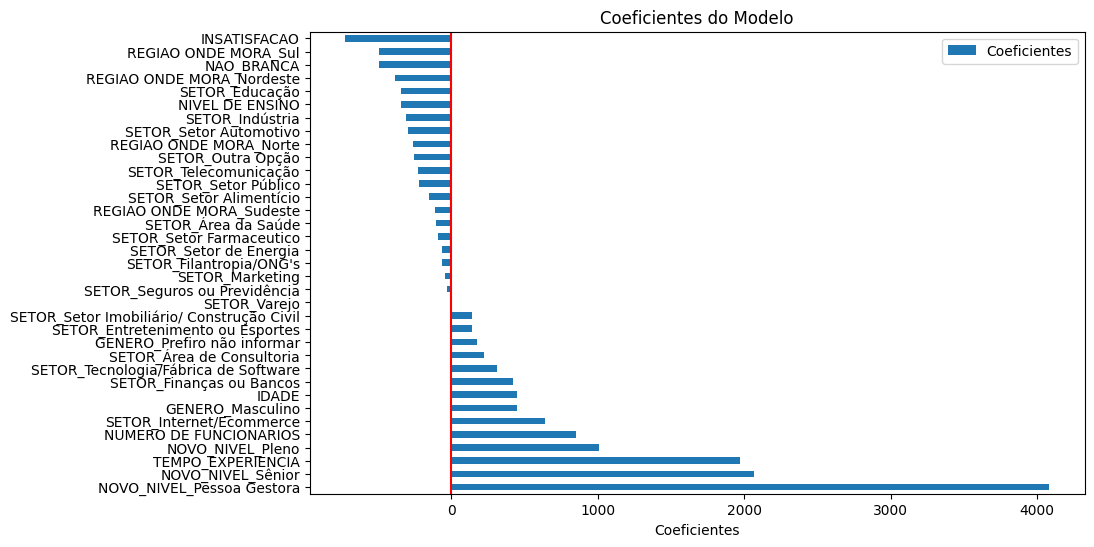

In [348]:
coefs.plot.barh(figsize=(10,6))
plt.axvline(x=0, color='red')
plt.xlabel("Coeficientes")
plt.title("Coeficientes do Modelo")
plt.show()

# Resultados da Análise

A análise revelou várias correlações importantes entre as variáveis estudadas:

1. **Relação entre Nível de Ensino e Salário**:
   - Foi observado que indivíduos com níveis mais altos de educação, como pós-graduação e doutorado, tendem a ter salários mais altos. Essa correlação sugere que a educação formal é um fator significativo para a remuneração no mercado de trabalho.

2. **Impacto do Tempo de Experiência**:
   - O tempo de experiência na área de dados foi positivamente correlacionado com o salário, indicando que mais tempo de trabalho se traduz em melhores remunerações. Trabalhadores com maior experiência tendem a ser mais valorizados financeiramente.

3. **Distribuição Étnica e Insatisfação**:
   - A análise da variável 'COR/RACA/ETNIA' revelou que trabalhadores não brancos têm uma percepção mais alta de insatisfação no trabalho, especialmente relacionada a fatores como salário e oportunidades de crescimento. Isso sugere a necessidade de uma atenção maior às questões de diversidade e inclusão nas empresas.

4. **Análise de Insatisfação**:
   - A insatisfação relacionada a salários foi uma das principais reclamações identificadas, indicando que políticas de remuneração mais transparentes e justas poderiam ser benéficas para aumentar a satisfação dos empregados.

Esses resultados proporcionam uma visão abrangente sobre as dinâmicas de emprego e renda, permitindo que empresas e formuladores de políticas tomem decisões informadas para melhorar as condições de trabalho e promover a inclusão no mercado.